In [1]:
%pylab notebook
from IPython.display import Latex

Populating the interactive namespace from numpy and matplotlib


Le triangle ABC, dangereux pour la navigation, a pour aire 756 km2 et pour côtés des nombres entiers de km (AB mesure 42 km). Pour chaque point D où un navire a sombré, une association a tracé une carte où les parallèles aux côtés de ABC passant par D délimitent trois « triangles de recueillement ».

* Pour le naufrage du Père Dition, le périmètre de chacun de ces triangles est égal à la longueur du côté de ABC avec lequel il possède un côté commun.

* Pour le naufrage de la Cool Douce, la somme des aires des triangles de recueillement est la plus petite possible.

Questions:

* 1A. Quelle est, en mètres, la distance du point de naufrage du Père Dition au côté AB ? 

* 2A. Quelle est, en mètres, la distance entre les deux lieux de sinistre ?

Source: problème [no 1012](http://www.affairedelogique.com/espace_probleme.php?corps=probleme&num=1012)

## Determination of the measures of triangle $(ABC)$

Let $H$ be the orthogonal projection of $C$ on $(AB)$. Hence, the surface $\sigma$ of triangle $(ABC)$ is $\sigma=\frac{1}{2}AB\;CH$ hence $CH=\frac{2\sigma}{AB}$. By symmetry, we can assume that $AH\leq\frac{1}{2}AB$ and, since $AC^2=AH^2+CH^2$, we have
\begin{equation*}
CH\leq AC\leq\sqrt{CH^2+(\frac{1}{2}AB)^2}
\end{equation*}
Now, we have $BC^2=AC^2+AB^2-2AB\;AH$, hence
\begin{equation*}
2AB\sqrt{AC^2-CH^2} = AC^2+AB^2-BC^2
\end{equation*}
By hypothesis, the right-hand side is integral, so we need to find the (integral) $AC$ between $CH$ and $\sqrt{CH^2+(\frac{1}{2}AB)^2}$ such that $2AB\sqrt{AC^2-CH^2}$ is non null integral. $AC$ can thus be determined by enumeration.

In [2]:
σ = 756.
AB = 42.
CH = 2*σ/AB
r = arange(ceil(CH), sqrt((AB/2)**2+CH**2))
t = 2*AB*sqrt(r**2-CH**2)
AC, = r[(abs(t-rint(t))<1.e-6) & (t>0)]
AH = sqrt(AC**2-CH**2)
BH = AB-AH
BC = sqrt(BH**2+CH**2)
res = ('{}&=&{:g}'.format(k,v) for k,v in (('AB',AB),('AC',AC),('BC',BC),('AH',AH),('BH',BH),('CH',CH)))
Latex(r'$\begin{array}{rcl} %s \end{array}$'%(r' \\ '.join(res)))

<IPython.core.display.Latex object>

In [3]:
A,B,C,H = array(((0.,0.),(AB,0.),(AH,CH),(AH,0.)))

In [75]:
def P(u,v,w):
  return u*A+v*B+w*C
def annotate(ax,**ka):
  for k,(xy,d) in ka.items():
    ax.annotate('${}$'.format(k),xy,xytext=d,textcoords='offset points',ha='center',va='center')
def display_frame(ax):
  ax.set(aspect='equal',xticks=(),yticks=())
  ax.plot(*zip(A,B,C,A),c='b',zorder=1)
  annotate(ax,A=(A,(-4.,-4.)),B=(B,(4.,-4.)),C=(C,(0.,4.)))
def fill_zone(zone,u,v,w):
  zone.set_xy([P(u,1-u,0),P(u,0,1-u),P(1-w,0,w),P(0,1-w,w),P(0,v,1-v),P(1-v,v,0)])
  zone.pname = r'[$u={:.2g},v={:.2g},w={:.2g}$]'.format(u,v,w)

def display1(ax):
  display_frame(ax)
  ax.plot(*zip(C,H),c='k',ls='--')
  annotate(ax,H=(H,(0.,-4.)))
  # sample zone
  zone, = ax.fill((),(),zorder=0,c='lightgreen')
  u,v,w = 1./8.,5./8.,2./8.
  fill_zone(zone,u,v,w)
  annotate(ax,D=(P(u,v,w),(0.,0.)),Bʹ=(P(0,1-w,w),(4.,4.)),Cʹ=(P(0,v,1-v),(4.,4.)))
  ax.set_title(zone.pname,fontsize='x-small')

<IPython.core.display.Javascript object>


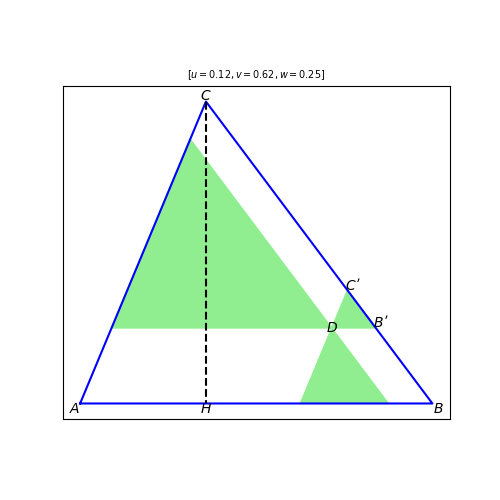

In [76]:
fig,ax = subplots(figsize=(5,5),frameon=False)
display1(ax)

## Solution

A point $D$ within triangle $(ABC)$ can be represented by its barycentric coordinates $u,v,w\geq0$ such that $u+v+w=1$. Let $B',C'$ be the intersections of $(BC)$ with the lines parallel to $(AB)$ and $(AC)$ respectively, going through $D$. We have
\begin{eqnarray*}
D & = & uA+vB+wC\\
B' & = & (1-w)B+wC\\
C' & = & vB+(1-v)C
\end{eqnarray*}
Observe that
\begin{equation*}
\vec{DB'} = u\vec{AB} \hspace{2cm} \vec{DC'} = u\vec{AC} \hspace{2cm} \vec{BB'}=w\vec{BC} \hspace{2cm} \vec{CC'}=v\vec{CB}
\end{equation*}

* In the case of "Père Dition", we have by hypothesis $DB'+DC'+B'C'= BC$, hence $DB'+DC'=BB'+CC'$. Hence, $u(AB+AC)=(v+w)BC=(1-u)BC$ hence $u=\frac{1}{\rho}BC$ where $\rho\triangleq AB+BC+CA$ is the perimeter of triangle $(ABC)$. By symmetry, we get
  \begin{equation*}
  u=\frac{1}{\rho}BC \hspace{2cm} v=\frac{1}{\rho}AC \hspace{2cm} w=\frac{1}{\rho}AB
  \end{equation*}
  Let $R_1$ be the distance from $D$ to $(AB)$. We have
  \begin{equation*}
  R_1 = \frac{|\vec{AD}\wedge\vec{AB}|}{AB} = \frac{|(v\vec{AB}+w\vec{AC})\wedge\vec{AB}|}{AB} = w\frac{|\vec{AC}\wedge\vec{AB}|}{AB} = \frac{1}{\rho}|\vec{AC}\wedge\vec{AB}|=\frac{2\sigma}{\rho}
  \end{equation*}

* In the case of "Cool Douce", observe that the surface of triangle $(DB'C')$ is given by $\frac{1}{2}|\vec{DB'}\wedge\vec{DC'}|=u^2\sigma$, hence the total surface of the triangles is $\sigma(u^2+v^2+w^2)$. By symmetry, it is minimal when $u=v=w=\frac{1}{3}$. The distance $R_2$ to "Père Dition" is given by
  \begin{equation*}
  R_2 = \sqrt{-(\frac{AC}{\rho}-\frac{1}{3})(\frac{BC}{\rho}-\frac{1}{3})AB^2-(\frac{BA}{\rho}-\frac{1}{3})(\frac{CA}{\rho}-\frac{1}{3})BC^2-(\frac{CB}{\rho}-\frac{1}{3})(\frac{AB}{\rho}-\frac{1}{3})CA^2}
  \end{equation*}

In [6]:
ρ = AB+AC+BC
rep_1 = 2*σ/ρ
rep_2 = sqrt(-(AC/𝜌-1/3)*(BC/𝜌-1/3)*AB**2-(AB/𝜌-1/3)*(AC/𝜌-1/3)*BC**2-(BC/𝜌-1/3)*(AB/𝜌-1/3)*AC**2)
res = ('{}&=&{:g}'.format(k,v) for k,v in (('R_1',rep_1),('R_2',rep_2)))
Latex(r'$\begin{array}{rcl} %s \end{array}$'%(r' \\ '.join(res)))

<IPython.core.display.Latex object>

In [77]:
def control_widget(callback):
  from IPython.display import display
  from ipywidgets import Select
  W = {}
  a = array((BC,AC,AB)); a /= sum(a); W['Père Dition'] = tuple(a)
  u = 1./3.; W['Cool Douce'] = u,u,u
  ctrl = Select(options=W)
  ctrl.observe((lambda x: callback(ctrl.value)),'value')
  display(ctrl)
  callback(ctrl.value)
  return ctrl
def display2(ax):
  display_frame(ax)
  zone, = ax.fill((),(),zorder=0,c='lightgreen')
  def show(coord):
    u,v,w = coord
    fill_zone(zone,u,v,w)
    ax.set_title(zone.pname,fontsize='x-small')
  control_widget(show)

<IPython.core.display.Javascript object>


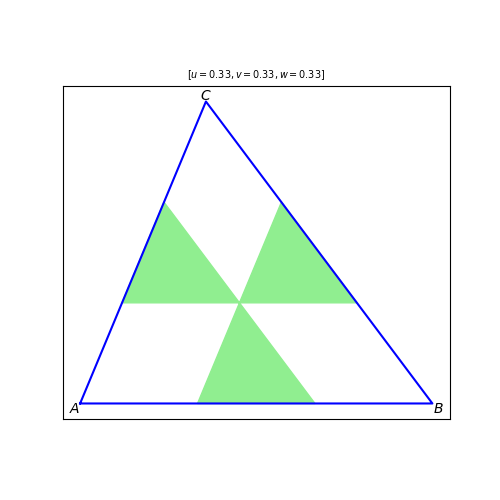

Select(options={'Père Dition': (0.35714285714285715, 0.30952380952380953, 0.3333333333333333), 'Cool Douce': (…

In [78]:
fig,ax = subplots(figsize=(5,5),frameon=False)
display2(ax)